# Introduction to RDKit

There are also libraries in Python that are made for working just with chemical data. One commonly used library in Python for data science (or cheminformatics) is called RDKit.

RDKit lets us create variables which represent molecules and retrieve information about the molecules. 

We are going to use a part of RDKit called `Chem`. To use `Chem`, we first have to import it. 

In [1]:
from rdkit import Chem

## Creating Molecules with RDKit

To get information about molecules in RDKit, we have to have RDKit retreive the information. The molecule name has to be communicated to RDKit in a way that computers understand. We could open info from molecular file formats like `mol`.

We are going to use a format called SMILES. SMILES stands for "Simplified Molecular-Input Line-entry System" and is a string representation of a molecule. You usually will be looking up SMILES or having a program generate them for you. 

In SMILES, if we want methane, we specify that with "C". We can create a representation of methane using RDKit by using the `MolFromSmiles` function in `rdkit.Chem`.

In [2]:
methane = Chem.MolFromSmiles("C")

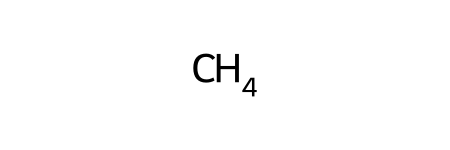

In [3]:
methane

## Retrieving Molecule Information

RDKit will allow us to access information about our molecule. For example, we can have RDKit tell us the number of atoms in our molecule.

In [4]:
num_methane = methane.GetNumAtoms()
print(f"The number of atoms in methane is {num_methane}")

The number of atoms in methane is 1


This isn't exactly what we expect. By default, RDKit only counts "heavy atoms". This means that hydrogen isn't included. We can tell RDKit to count hydrogens by adding `onlyExplicit=False` to our `GetNumAtoms` function.

In [5]:
num_methane_h = methane.GetNumAtoms(onlyExplicit=False)
print(f"The number of atoms in methane including hydrogens is {num_methane_h}.")

The number of atoms in methane including hydrogens is 5.


<div class="exercise-this-is-a-title exercise">
    <p class="exercise-title">Check Your Understanding</p>
    <p>Create a molecule called ethane and print the number of atoms. The SMILES for ethane is `CC`.</p>
    
```{admonition} Answer
:class: dropdown

    
```python
ethane = Chem.MolFromSmiles("CC")
num_ethane_h = ethane.GetNumAtoms(onlyHeavy=False)
print(f"Ethane has {num_ethane_h} atoms.")
```
</div>

In [6]:
ethanol = Chem.MolFromSmiles("CCO")

We can also get information about atoms or  bonds from RDKit molecules. We can use the `GetAtoms()` function, then use a loop to look at the atoms.

In [7]:
for atom in ethanol.GetAtoms():
    print(atom.GetSymbol())

C
C
O


or, get information about the bonds.

In [8]:
for bond in ethanol.GetBonds():
    print(bond.GetBondType())

SINGLE
SINGLE


In the SMILES format, `=` signifies a double bond, and `#` signifies a triple bond.

For example, to create ethene or ehtyne

In [9]:
ethene = Chem.MolFromSmiles("C=C")
ethyne = Chem.MolFromSmiles("C#C")

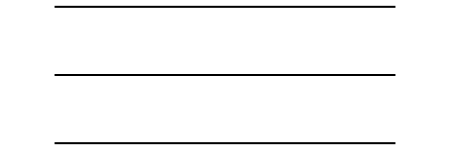

In [10]:
ethyne

You can find SMILES for more complicated online on websites like [PubChem](https://pubchem.ncbi.nlm.nih.gov/).

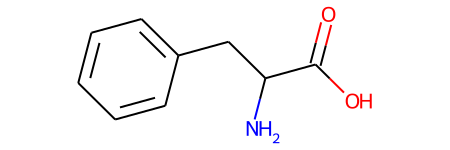

In [11]:
phenylalanine = Chem.MolFromSmiles("C1=CC=C(C=C1)CC(C(=O)O)N")
phenylalanine

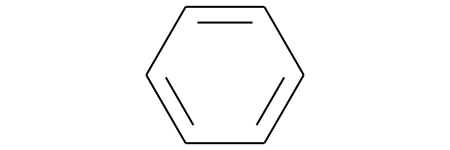

In [12]:
benzene = Chem.MolFromSmiles("c1ccccc1")
benzene

## Molecular Descriptors

RDKit has a module for retrieving molecular descriptors. Molecular descriptors are properties of molecules which can be analyzed using statistical methods to make predictions about molecular properties. 

To get molecular descriptors from RDKit, we import the `Descriptors` module.

In [13]:
from rdkit.Chem import Descriptors

Some molecular descriptors we might be interested in are:

1. Heavy Atom Count (`HeavyAtomCount`)
2. Number of hydrogen bond acceptrs (`NumHAcceptors`)
3. Number of hydrogen bond donors (`NumHDonors`)
4. Number of valence electrons (`NumValenceElectrons`)
5. Molecular weight (`MolWt`)
6. Number of aromatic rings (`NumAromaticRings`)
And many others!

To get the descritpor you're interested in, the syntax is

```python
Descriptors.DescriptorName(molecule_variable)
```

In [14]:
print("Printing info for benzene")
print(f"The molecular weight is {Descriptors.MolWt(benzene)}")
print(f"The number of aromatic rings is {Descriptors.NumAromaticRings(benzene)}")


Printing info for benzene
The molecular weight is 78.11399999999999
The number of aromatic rings is 1


## Substructure Search

RDKit can do a lot. One thing you can do are substructure searches. You can identify when molecules contain other molecules. Let's try this with benzene and phenylalanine.

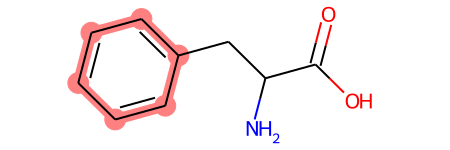

In [15]:
matches = phenylalanine.GetSubstructMatches(benzene)
phenylalanine